# Data exploration

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Creating the graph

In [3]:
edges_file_path = "./../data/raw/graph_edges.txt"

txt_file = open(edges_file_path)
edge_list = []
node_set = set([])

for line in txt_file:
    line_elements = line.split()
    if(line_elements[0] == "#"):
        pass
    else:
        edge = [int(x) for x in line_elements]
        nodes = [int(x) for x in line_elements]
        edge_list.append(edge)
        node_set.update(nodes)

txt_file.close()

edge_list = np.array(edge_list)
node_list = np.sort(np.array(list(node_set)))


communities_file_path = "./../data/raw/5000_communities.txt"

txt_file = open(communities_file_path)
community_count = 0
distribution_list = []

for line in txt_file:
    line_elements = [int(x) for x in line.split()]
    distribution_list.append(len(line_elements))
    community_count+=1

txt_file.close()

g = nx.Graph()
g.add_nodes_from(node_list)
g.add_edges_from(edge_list)

## Visualising some communities

In [30]:
communities_file_path = "./../data/raw/5000_communities.txt"
nodes = []
txt_file = open(communities_file_path , "r")
count = 0

for line in txt_file:
    line_elements = [int(x) for x in line.split()]
    if(len(line_elements) > 50):
        nodes.append(line_elements)
    if(count == 5):
        break
    
txt_file.close()

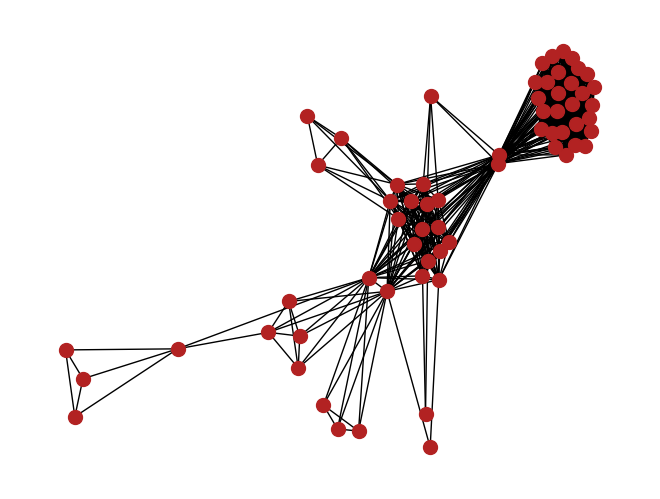

In [34]:
nx.draw(g.subgraph(nodes[0]) , node_color="#B22222" , node_size=100)

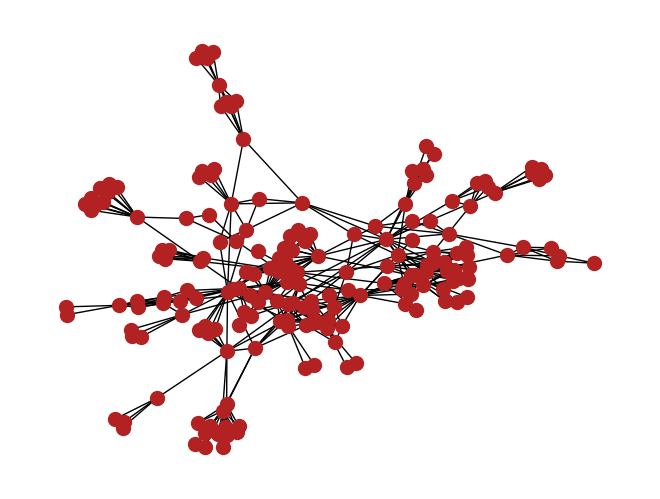

In [35]:
nx.draw(g.subgraph(nodes[2]) , node_color="#B22222", node_size=100)

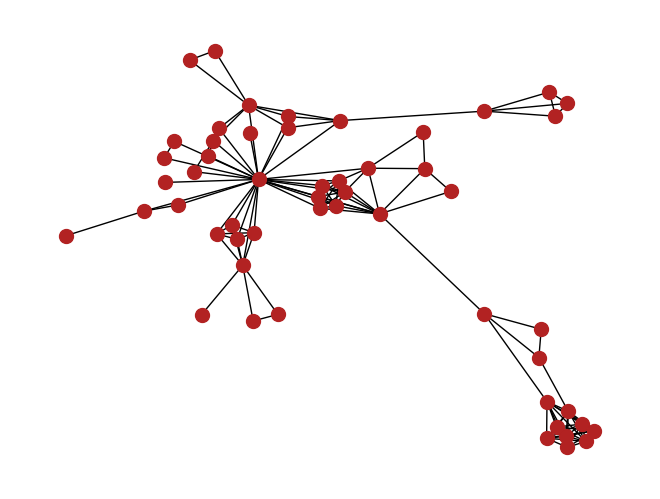

In [37]:
nx.draw(g.subgraph(nodes[3]) , node_color="#B22222" , node_size=100)

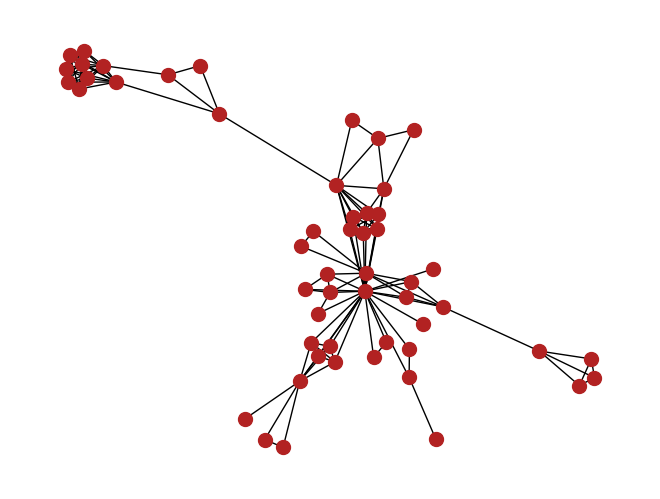

In [38]:
nx.draw(g.subgraph(nodes[3]) , node_color="#B22222", node_size=100)

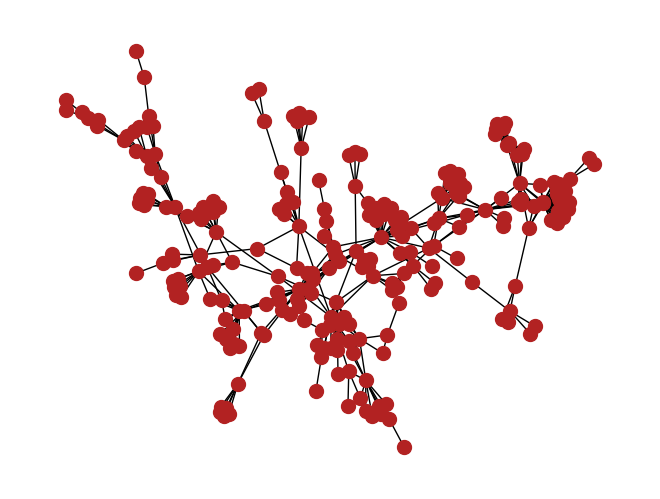

In [39]:
nx.draw(g.subgraph(nodes[4]) , node_color="#B22222", node_size=100)

## General graph statistics

### Number of nodes

In [15]:
len(g.nodes)    # number of nodes in dataset

317080

### Number of edges

In [16]:
len(g.edges)    # number of edges

1049866

### Average clustering coefficient

In [17]:
nx.average_clustering(g)

0.6324308280637171

### Degree distribution of nodes

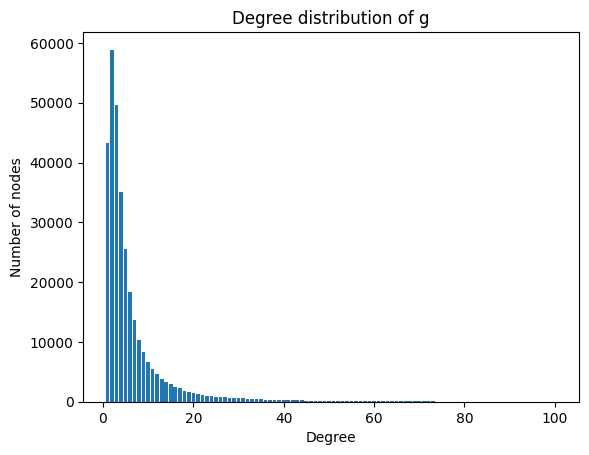

In [18]:
degrees = np.array(list((dict((g.degree))).values()))
unique, counts = np.unique(degrees, return_counts=True)
degree_value_counts = np.stack([unique , counts] , axis=0)

plt.bar(unique[:100] , counts[:100])
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree distribution of g")
plt.show()

In [19]:
print(f"Maximum node degree in g is {unique.max()}")
print(f"Minimum node degree in g is {unique.min()}")

Maximum node degree in g is 343
Minimum node degree in g is 1


## Communities statistics

In [4]:
print("Number of communities:" , len(distribution_list))

Number of communities: 5000


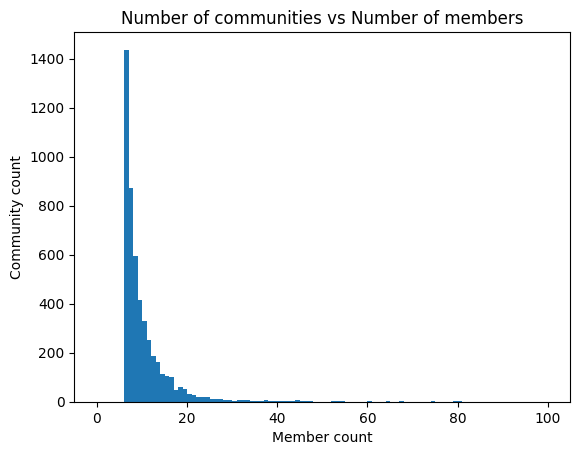

In [5]:
plt.hist(distribution_list , range=[0,100] , bins=100)
plt.xlabel("Member count")
plt.ylabel("Community count")
plt.title("Number of communities vs Number of members")
plt.show()

In [21]:
print(f"Largest community contains {max(distribution_list)} nodes")
print(f"Smallest community contains {min(distribution_list)} nodes")

Largest community contains 7556 nodes
Smallest community contains 6 nodes
